In [85]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [86]:
#load the data
df = pd.read_csv('/content/data.csv')

In [87]:
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [88]:
#scaling the features values
scaler = StandardScaler()
scaler.fit(df.drop('result',axis=1))
scaled_feat = scaler.transform(df.drop('result',axis=1))
scaled_df = pd.DataFrame(scaled_feat,columns = df.columns[:-1])
scaled_df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,-1.730045,0.698221,-1.15245,0.207592,1.101492,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,2.971339
1,-1.726031,0.621646,-1.15245,-1.170499,0.437943,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
2,-1.722017,1.540540,-1.15245,0.207592,-0.225607,-0.471571,2.877424,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,5.092319
3,-1.718003,1.004519,-1.15245,-1.170499,0.703363,2.120570,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230
4,-1.713989,1.004519,-1.15245,0.207592,0.570653,-0.471571,-0.347533,0.465755,0.401355,0.244914,0.135161,0.054668,0.03406,-0.422230


In [89]:
#split the data into train, validation, and test
x_train, x_test, y_train, y_test = train_test_split(scaled_df , df['result'], test_size=0.2)

In [90]:
#train the model and perform balance between the 2 classes
model = SVC(kernel = 'rbf', class_weight='balanced',C=5, gamma=0.01)
model.fit(x_train,y_train)

SVC(C=5, class_weight='balanced', gamma=0.01)

In [91]:
#perform the prediction on the validation data and print the confusion matrix
y_predict = model.predict(x_train)
conf_matrix = confusion_matrix(y_train,y_predict)
print(conf_matrix)

[[562  34]
 [  3  91]]


In [92]:
#print the metrics for validation step
report = print(classification_report(y_train,y_predict))
print(report)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       596
           1       0.73      0.97      0.83        94

    accuracy                           0.95       690
   macro avg       0.86      0.96      0.90       690
weighted avg       0.96      0.95      0.95       690

None


In [93]:
#perform grid search to find the best value for gamma and kernal type
param_search = { 'C': [0.1,1.0, 10, 10], 'gamma': [1,0.1,0.01,0.001],'kernel': [ 'poly', 'sigmoid', 'rbf']}
grid = GridSearchCV(SVC(), param_search ,refit=True, verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10, 10],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly', 'sigmoid', 'rbf']},
             verbose=2)

In [94]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [95]:
#it was observed that the best value for max_depth is 1, gamma is .1, and kernal rbf
model = SVC(kernel = 'rbf', class_weight='balanced',C=10, gamma=.1)

model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [96]:
#print the confusion matrix for the model 
conf_matrix = confusion_matrix(y_test,prediction)
print(conf_matrix)

[[155   4]
 [  4  10]]


In [97]:
#print the metrics for the model in the test process
report = print(classification_report(y_test,prediction))
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       159
           1       0.71      0.71      0.71        14

    accuracy                           0.95       173
   macro avg       0.84      0.84      0.84       173
weighted avg       0.95      0.95      0.95       173

None


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x360 with 0 Axes>

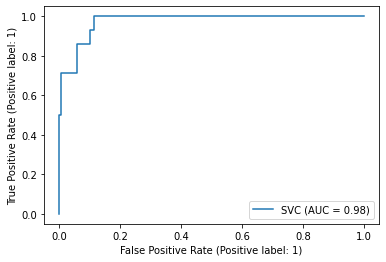

In [98]:
#plot ROC curve
plt.figure(figsize=(8,5))
metrics.plot_roc_curve(model, x_test, y_test)
plt.show()